In [1]:
import sys
import time

sys.path.append("..")
import uniplot as up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import solv_fzcp as sfzcp
import uvarprob as uvpr

In [2]:
test_file = "../tst2.csv"

In [3]:
# Maximal number of steps
max_steps = 1e6
# Tolerance
epsilon = 1e-2
# If True - global Lipschitz constant is used
global_lipschitz_interval = True
# If True - the record value is taken from the test database
known_record = False
# How many points to skip in vizualization - regular step
skip = 1000
# The size of the legend in plots
legend_size = 2

In [4]:
def read_problems(fname):
    data = pd.read_csv(fname, index_col='name', comment='#')
    return data

In [5]:
df = read_problems(test_file)
df

,objective,a,b,min_f,min_x
name,,,,,
1,x^3+2.*x+cos(10.*x),-3.0,3.0,0,0
2,-(x^2.)*sin(1.*x)+1.0,0.2,7.0,0,0
3,(3.*x-1.4)*sin(18.*x)+1.7,0.0,7.0,0,0
4,(x+ 1.)^3/x^2-7.1,0.1,7.0,0,0
5,sin(x)/x+cos(x),0.1,10.0,0,0
6,x^3-3.0*x^2+2.0*x+5.0*sin(5.0*x),-5.0,5.0,0,0
7,1/16.0*x^6 - 3/5.0*x^5 - 13/2.0 * x^4 + 211/1...,-5.0,5.0,0,0
8,log(x)+1.0/x^2-2,0.1,10.0,0,0
9,x^7 + x^6 - 3.0*x^5 - 10.0*x^4 + 14.0*x^3 - 1...,-5.0,5.0,0,0


In [6]:
points_db = {}
psl_lipint_points_list = []
psl_lip_points_list = []
psqe_lipint_points_list = []
psqe_lip_points_list = []
bnb2_lipint_points_list = []
bnb2_lip_points_list = []

In [7]:
def log_point(x, points_list):
    points_list.append(x)

In [13]:
from FZCP.test import test_alg2

test_alg2(df, 1e-5, global_lip=False, repeat=10)

test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R
1 & 0.00059 & 0.00045 & 0.00036 & 0.00035 & 0.00019 & 0.00017 & 0.00013 & 0.00012 \\
2 & 0.00044 & 0.00036 & 0.00049 & 0.00048 & 0.00018 & 0.00018 & 0.00016 & 0.00016 \\
3 & 0.00057 & 0.00050 & 0.00050 & 0.00050 & 0.00032 & 0.00027 & 0.00023 & 0.00023 \\
4 & 0.00059 & 0.00046 & 0.00069 & 0.00063 & 0.00041 & 0.00034 & 0.00036 & 0.00032 \\
5 & 0.00045 & 0.00039 & 0.00064 & 0.00060 & 0.00018 & 0.00016 & 0.00023 & 0.00036 \\
6 & 0.00242 & 0.00239 & 0.00030 & 0.00028 & 0.00026 & 0.00037 & 0.00015 & 0.00013 \\
7 & 0.00051 & 0.00040 & 0.00034 & 0.00032 & 0.00024 & 0.00019 & 0.00013 & 0.00011 \\
8 & 0.00028 & 0.00020 & 0.00028 & 0.00024 & 0.00012 & 0.00011 & 0.00012 & 0.00011 \\
9 & 0.00125 & 0.00081 & 0.00083 & 0.00080 & 0.00066 & 0.00059 & 0.00049 & 0.00038 \\
10 & 0.00113 & 0.00060 & 0.00106 & 0.00077 & 0.00056 & 0.00043 & 0.00052 & 0.00034 \\
Min & 1.2 & 1.1 & 1.8 & 1.7 & 0.5 & 0.4 & 0.6 & 1.0 \\
Max & 18.4 & 18.2 & 3.2 & 3.0 & 2.2 & 2.8 &

In [14]:
from FZCP.test import test_alg3

test_alg3(df, 1e-5, global_lip=True, repeat=10)

test.Index,PC_2,PI_2,QC_2,QI_2,PC_3,PI_3,QC_3,QI_3
1 & 0.00032 & 0.00019 & 0.00011 & 0.00010 & 0.00034 & 0.00018 & 0.00011 & 0.00009 \\
2 & 0.00079 & 0.00060 & 0.00010 & 0.00009 & 0.00087 & 0.00069 & 0.00009 & 0.00008 \\
3 & 0.00080 & 0.00066 & 0.00020 & 0.00019 & 0.00131 & 0.00091 & 0.00028 & 0.00023 \\
4 & 0.42751 & 0.07689 & 0.00943 & 0.00164 & 0.61006 & 0.10708 & 0.01406 & 0.00245 \\
5 & 0.00148 & 0.00127 & 0.00026 & 0.00024 & 0.00211 & 0.00175 & 0.00034 & 0.00031 \\
6 & 0.00088 & 0.00055 & 0.00008 & 0.00007 & 0.00131 & 0.00075 & 0.00008 & 0.00008 \\
7 & 0.00138 & 0.00117 & 0.00008 & 0.00008 & 0.00195 & 0.00159 & 0.00010 & 0.00010 \\
8 & 0.00325 & 0.00016 & 0.00021 & 0.00006 & 0.00478 & 0.00019 & 0.00025 & 0.00007 \\
9 & 0.16594 & 0.08185 & 0.00095 & 0.00088 & 0.24684 & 0.12016 & 0.00134 & 0.00122 \\
10 & 0.29113 & 0.24861 & 0.00150 & 0.00070 & 0.43150 & 0.36041 & 0.00219 & 0.00098 \\
Min & 3.4 & 2.0 & 0.8 & 0.7 & 3.6 & 1.9 & 1.0 & 1.0 \\
Max & 297.3 & 253.9 & 3.8 & 1.1 & 440.7 & 3

In [11]:
from FZCP.test import test_alg3

test_alg3(df, 1e-5, global_lip=False, repeat=1)

test.Index,PC_2,PI_2,QC_2,QI_2,PC_3,PI_3,QC_3,QI_3
1 & 0.00036 & 0.00022 & 0.00029 & 0.00022 & 0.00030 & 0.00027 & 0.00047 & 0.00028 \\
2 & 0.00042 & 0.00033 & 0.00029 & 0.00026 & 0.00032 & 0.00031 & 0.00029 & 0.00029 \\
3 & 0.00057 & 0.00044 & 0.00038 & 0.00046 & 0.00059 & 0.00051 & 0.00050 & 0.00057 \\
4 & 0.00061 & 0.00067 & 0.00058 & 0.00052 & 0.00076 & 0.00058 & 0.00065 & 0.00051 \\
5 & 0.00028 & 0.00023 & 0.00029 & 0.00025 & 0.00026 & 0.00022 & 0.00032 & 0.00027 \\
6 & 0.00033 & 0.00024 & 0.00017 & 0.00015 & 0.00040 & 0.00031 & 0.00018 & 0.00015 \\
7 & 0.00029 & 0.00022 & 0.00016 & 0.00012 & 0.00033 & 0.00026 & 0.00019 & 0.00016 \\
8 & 0.00015 & 0.00013 & 0.00014 & 0.00012 & 0.00014 & 0.00013 & 0.00015 & 0.00013 \\
9 & 0.00069 & 0.00057 & 0.00052 & 0.00045 & 0.00086 & 0.00071 & 0.00061 & 0.00049 \\
10 & 0.00059 & 0.00044 & 0.00054 & 0.00035 & 0.00067 & 0.00051 & 0.00078 & 0.00045 \\
Min & 1.0 & 0.8 & 0.7 & 0.8 & 1.0 & 0.8 & 0.9 & 1.0 \\
Max & 2.2 & 1.6 & 1.2 & 1.0 & 2.7 & 2.1 & 1

In [10]:
from FZCP.test import test_casado

test_casado(df, 1e-5,  repeat=100)

Index & IBB & local Lip & global Lip \
1 & 0.000396 & 0.000134 & 0.000058 \\
2 & 0.000216 & 0.000188 & 0.000078 \\
3 & 0.000349 & 0.000329 & 0.000229 \\
4 & 0.003883 & 0.000761 & 0.002787 \\
5 & 0.000204 & 0.000220 & 0.000297 \\
6 & 0.002063 & 0.000123 & 0.000075 \\
7 & 0.000904 & 0.000137 & 0.000094 \\
8 & 0.000725 & 0.000113 & 0.000064 \\
9 & 0.002011 & 0.000467 & 0.001189 \\
10 & 0.001147 & 0.000424 & 0.000954 \\
Min & 0.7 & 0.3 & 1.0 \\
Max & 27.6 & 2.4 & 1.0 \\
Average & 6.5 & 1.3 & 1.0 \\
Index & IBB & local Lip & global Lip \
1 & 29 & 8 & 8 \\
2 & 21 & 5 & 8 \\
3 & 36 & 15 & 39 \\
4 & 251 & 13 & 508 \\
5 & 26 & 7 & 45 \\
6 & 177 & 7 & 10 \\
7 & 55 & 6 & 12 \\
8 & 33 & 7 & 10 \\
9 & 93 & 13 & 151 \\
10 & 51 & 9 & 121 \\
Min & 0.4 & 0.0 & 1.0 \\
Max & 17.7 & 1.0 & 1.0 \\
Average & 3.5 & 0.4 & 1.0 \\


In [15]:
for test in df.itertuples():
    print(test.Index)
    points_db[test.Index] = {'psl_lipint_points_list': [], 'psl_lip_points_list': [], 'psqe_lipint_points_list': [],
                             'psqe_lip_points_list': [], 'bnb2_pslint_points_list': [], 'bnb2_psl_points_list': [],
                             'bnb2_lipint_points_list': [],
                             'bnb2_lip_points_list': []}

    # #
    # T1 = time.perf_counter()
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['bnb2_psl_points_list']))
    # print('Piyavskii, Lipschitz constant:',
    #       sfzcp.new_method(prob, symm=True, epsilon=1e-5, global_lipschitz_interval=False, estimator=1))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)
    #
    # T1 = time.perf_counter()
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['bnb2_pslint_points_list']))
    # print('Piyavskii, Lipschitz interval:',
    #       sfzcp.new_method(prob, symm=False, epsilon=1e-5, global_lipschitz_interval=False, estimator=1))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)
    #
    # T1 = time.perf_counter()
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['bnb2_lip_points_list']))
    # print('PSQE, Lipschitz constant:',
    #       sfzcp.new_method(prob, symm=True, epsilon=1e-5, global_lipschitz_interval=False, estimator=2))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)

    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_lipint_points_list']))

    # T1 = time.perf_counter()
    # print('PSQE, Lipschitz constant:',
    #       sfzcp.new_method(prob, symm=False, epsilon=1e-7, global_lipschitz_interval=True, estimator=2,reduction=False))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)
    #
    T1 = time.perf_counter()
    print('PSQE, Lipschitz interval:',
          sfzcp.new_method(prob, symm=False, epsilon=1e-7, global_lipschitz_interval=True, estimator=2, reduction=True))
    T2 = time.perf_counter()
    print('time=', T2 - T1)
    T1 = time.perf_counter()
    print('Casado, Lipschitz interval:',
          sfzcp.cas(prob=prob,sym=False,epsilon=1e-7))
    T2 = time.perf_counter()
    print('time=', T2 - T1)
    # T1 = time.perf_counter()
    # print('Casado:', sfzcp.cas(prob, epsilon=1e-5))
    # T2 = time.perf_counter()
    # print('time=', T2 - T1)

1
PSQE, Lipschitz interval: TestResult(nsteps=8, first_crossing_zero_point=[-0.13045343909099016])
time= 0.00028687499434454367
Casado, Lipschitz interval: TestResult(nsteps=37, first_crossing_zero_point=-0.1304534504393797)
time= 0.0005669579986715689
2
PSQE, Lipschitz interval: TestResult(nsteps=8, first_crossing_zero_point=[1.0682235441972114])
time= 0.00018091599486069754
Casado, Lipschitz interval: TestResult(nsteps=25, first_crossing_zero_point=1.0682235502297557)
time= 0.0006280000015976839
3
PSQE, Lipschitz interval: TestResult(nsteps=40, first_crossing_zero_point=[1.2655389140501498])
time= 0.0003330000035930425
Casado, Lipschitz interval: TestResult(nsteps=39, first_crossing_zero_point=1.2655388825177132)
time= 0.0005320420023053885
4
PSQE, Lipschitz interval: TestResult(nsteps=508, first_crossing_zero_point=[1.3646464623978662])
time= 0.0023734159985906444
Casado, Lipschitz interval: TestResult(nsteps=353, first_crossing_zero_point=1.3646464558897629)
time= 0.003057417001400

In [10]:
print('test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R')
eps = 1e-7
min_list = (float('inf'),) * 8
max_list = (0,) * 8
sum_list = (0,) * 8
for test in df.itertuples():
    points_db[test.Index] = {'bnb2_pslint_points_list': []}
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_pslint_points_list']))
    T1 = time.perf_counter()
    PC_N = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=False).nsteps
    T2 = time.perf_counter()
    time_PC_N = T2 - T1
    min_list[0] = min(min_list[0], T2 - T1)
    max_list[0] = max(max_list[0], T2 - T1)
    sum_list[0] += T2 - T1
    T1 = time.perf_counter()
    PI_N = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=False).nsteps
    T2 = time.perf_counter()
    time_PI_N = T2 - T1
    min_list[1] = min(min_list[1], T2 - T1)
    max_list[1] = max(max_list[1], T2 - T1)
    sum_list[1] += T2 - T1
    T1 = time.perf_counter()
    QC_N = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=False).nsteps
    T2 = time.perf_counter()
    time_QC_N = T2 - T1
    min_list[2] = min(min_list[2], T2 - T1)
    max_list[2] = max(max_list[2], T2 - T1)
    sum_list[2] += T2 - T1
    T1 = time.perf_counter()
    QI_N = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=False).nsteps
    T2 = time.perf_counter()
    time_QI_N = T2 - T1
    min_list[3] = min(min_list[3], T2 - T1)
    max_list[3] = max(max_list[3], T2 - T1)
    sum_list[3] += T2 - T1
    T1 = time.perf_counter()
    PC_R = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=True).nsteps
    T2 = time.perf_counter()
    time_PC_R = T2 - T1
    min_list[4] = min(min_list[4], T2 - T1)
    max_list[4] = max(max_list[4], T2 - T1)
    sum_list[4] += T2 - T1
    T1 = time.perf_counter()
    PI_R = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=True).nsteps
    T2 = time.perf_counter()
    time_PI_R = T2 - T1
    min_list[5] = min(min_list[5], T2 - T1)
    max_list[5] = max(max_list[5], T2 - T1)
    sum_list[5] += T2 - T1
    T1 = time.perf_counter()
    QC_R = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=True).nsteps
    T2 = time.perf_counter()
    time_QC_R = T2 - T1
    min_list[6] = min(min_list[6], T2 - T1)
    max_list[6] = max(max_list[6], T2 - T1)
    sum_list[6] += T2 - T1
    T1 = time.perf_counter()
    QI_R = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=True).nsteps
    T2 = time.perf_counter()
    time_QI_R = T2 - T1
    min_list[7] = min(min_list[7], T2 - T1)
    max_list[7] = max(max_list[7], T2 - T1)
    sum_list[7] += T2 - T1

    # print('%s & %d & %d & %d & %d & %d & %d & %d & %d \\\\' %(test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R))
    print('%s & %.5f & %.5f & %.5f & %.5f & %.5f & %.5f & %.5f & %.5f \\\\' % (
        test.Index, time_PC_N, time_PI_N, time_QC_N, time_QI_N, time_PC_R, time_PI_R, time_QC_R, time_QI_R))

test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R


TypeError: 'tuple' object does not support item assignment

In [11]:
print('test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R')
eps = 1e-7
for test in df.itertuples():
    points_db[test.Index] = {'bnb2_pslint_points_list': []}
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_pslint_points_list']))
    PC_N = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=False).nsteps

    PI_N = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=False).nsteps
    QC_N = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=False).nsteps
    QI_N = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=False).nsteps

    PC_R = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=True).nsteps
    PI_R = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=1,
                            reduction=True).nsteps
    QC_R = sfzcp.new_method(prob, symm=True, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=True).nsteps
    QI_R = sfzcp.new_method(prob, symm=False, epsilon=eps, global_lipschitz_interval=True, estimator=2,
                            reduction=True).nsteps

    print('%s & %d & %d & %d & %d & %d & %d & %d & %d \\\\' % (
        test.Index, PC_N, PI_N, QC_N, QI_N, PC_R, PI_R, QC_R, QI_R))
    # P: Piyavskii estimator
    # Q: Piecewise smooth quadratic estimator
    # C: Lipschitz constant
    # I: Lipschitz interval
    # N: without reduction
    # R: with reduction

test.Index,PC_N,PI_N,QC_N,QI_N,PC_R,PI_R,QC_R,QI_R
1 & 126 & 62 & 42 & 42 & 67 & 44 & 8 & 8 \\
2 & 592 & 592 & 44 & 44 & 341 & 341 & 9 & 9 \\
3 & 725 & 725 & 93 & 93 & 417 & 417 & 53 & 53 \\
4 & 3747801 & 265037 & 5473 & 1219 & 2128998 & 260954 & 3761 & 715 \\
5 & 1698 & 1698 & 114 & 114 & 999 & 999 & 61 & 61 \\
6 & 1301 & 805 & 39 & 39 & 789 & 639 & 11 & 11 \\
7 & 1607 & 1563 & 47 & 45 & 946 & 911 & 15 & 14 \\
8 & 4813 & 109 & 101 & 39 & 2938 & 104 & 55 & 11 \\
9 & 339319 & 155683 & 313 & 307 & 214492 & 136490 & 203 & 200 \\
10 & 906892 & 836296 & 530 & 284 & 588546 & 563596 & 358 & 162 \\
11 & 139 & 139 & 25 & 25 & 85 & 85 & 17 & 17 \\
12 & 1431 & 179 & 43 & 43 & 859 & 167 & 9 & 9 \\
13 & 294 & 220 & 46 & 46 & 166 & 139 & 13 & 13 \\


In [11]:
def vis_trials(points_list, num_series, base_level):
    poix = np.array(list(set(points_list[::skip])))
    poiy = np.full(len(poix), base_level + num_series * -0.5)
    up.plot_points(poix, poiy, num_series)

Pandas(Index=1, objective='x^3+2.*x+cos(10.*x)', a=-3.0, b=3.0, min_f=0, min_x=0)


KeyError: 'bnb2_psl_points_list'

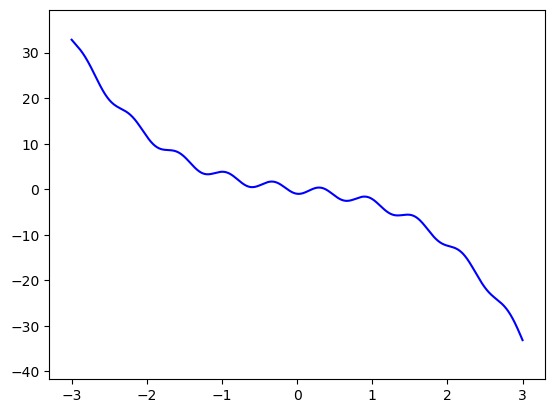

In [12]:
for test in df.itertuples():
    print(test)
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x)
    up.plot_problem(prob, {'function': 'b-'}, legend=legend_size)
    vis_trials(points_db[test.Index]['bnb2_psl_points_list'], 0, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['bnb2_pslint_points_list'], 1, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['bnb2_lip_points_list'], 2, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['bnb2_lipint_points_list'], 3, plt.ylim()[0] + legend_size)
    # vis_trials(points_db[test.Index]['psl_lipint_points_list'], 4, plt.ylim()[0] + legend_size)
    # vis_trials(points_db[test.Index]['psl_lip_points_list'], 5, plt.ylim()[0] + legend_size)
    #     print("ylim = ", plt.ylim()[0])
    file_name = test.Index + '.png'
    plt.savefig(file_name, dpi=500)
    plt.show()